In [1]:
%cd /lustre/scratch126/cellgen/team205/aa34/Arian/Dis2P/dis2p_reproducibility

/lustre/scratch126/cellgen/team205/aa34/Arian/Dis2P/dis2p_reproducibility


In [2]:
# enable autoreload
%load_ext autoreload
%autoreload 2
%matplotlib inline

import os
import random

import scvi
scvi.settings.seed = 0
import scanpy as sc
import anndata as ad
import torch
import numpy as np
import pandas as pd
from datetime import datetime
from scipy.sparse import csr_matrix
torch.set_float32_matmul_precision('medium')
import warnings
warnings.simplefilter("ignore", UserWarning)
import matplotlib.pyplot as plt
from matplotlib.pyplot import rc_context
import seaborn as sns


from celldisect import CellDISECT
from scvi.model.base import BaseModelClass
import rapids_singlecell as rsc

import scib

from sklearn.metrics import r2_score
from scipy.stats import pearsonr
import warnings
from tqdm import tqdm
warnings.filterwarnings("ignore")

Global seed set to 0
Global seed set to 0


In [3]:
adata = sc.read_h5ad('../eraslan_preprocessed1212_split_deg.h5ad')
adata = adata[adata.layers['counts'].sum(1) != 0].copy()

In [4]:
adata.layers['counts'].max()

3370.0

In [5]:
adata.X.max()

9.210441

In [6]:
from typing import NamedTuple

class _REGISTRY_KEYS_NT(NamedTuple):
    X_KEY: str = "X"
    BATCH_KEY: str = "batch"
    LABELS_KEY: str = "labels"
    PROTEIN_EXP_KEY: str = "proteins"
    CAT_COVS_KEY: str = "extra_categorical_covs"
    CONT_COVS_KEY: str = "extra_continuous_covs"
    INDICES_KEY: str = "ind_x"
    SIZE_FACTOR_KEY: str = "size_factor"
    LATENT_MODE_KEY: str = "latent_mode"
    LATENT_QZM_KEY: str = "latent_qzm"
    LATENT_QZV_KEY: str = "latent_qzv"


REGISTRY_KEYS = _REGISTRY_KEYS_NT()

In [7]:
cats = ['tissue', 'Sample ID', 'sex', 'Age_bin', 'CoarseCellType']
pre_path = '../models/ablation_dis2p_size/'
model_paths = []
for model_path in os.listdir(pre_path):
    model_paths.append(model_path)

In [8]:
model_paths

['dis2p_cE_split_2_AblationSize_2_512_128',
 'dis2p_cE_split_2_AblationSize_4_1024_1024',
 'dis2p_cE_split_2_AblationSize_2_512_10',
 'dis2p_cE_split_2_AblationSize_2_2048_512',
 'dis2p_cE_split_2_AblationSize_4_1024_512',
 'dis2p_cE_split_2_AblationSize_2_1024_1024',
 'dis2p_cE_split_2_AblationSize_4_128_128',
 'dis2p_cE_split_2_AblationSize_4_2048_10',
 'dis2p_cE_split_2_AblationSize_2_128_10',
 'dis2p_cE_split_2_AblationSize_4_2048_1024',
 'dis2p_cE_split_2_AblationSize_4_2048_512',
 'dis2p_cE_split_2_AblationSize_2_2048_10',
 'dis2p_cE_split_2_AblationSize_2_2048_128',
 'dis2p_cE_split_2_AblationSize_4_512_128',
 'dis2p_cE_split_2_AblationSize_2_512_512',
 'dis2p_cE_split_2_AblationSize_2_1024_128',
 'dis2p_cE_split_2_AblationSize_2_128_512',
 'dis2p_cE_split_2_AblationSize_4_128_10',
 'dis2p_cE_split_2_AblationSize_2_1024_512',
 'dis2p_cE_split_2_AblationSize_4_512_1024',
 'dis2p_cE_split_2_AblationSize_4_2048_128',
 'dis2p_cE_split_2_AblationSize_2_512_1024',
 'dis2p_cE_split_2_A

In [15]:
names = ["_".join(name.split('_')[-3:]) for name in model_paths]

In [16]:
names

['2_512_128',
 '4_1024_1024',
 '2_512_10',
 '2_2048_512',
 '4_1024_512',
 '2_1024_1024',
 '4_128_128',
 '4_2048_10',
 '2_128_10',
 '4_2048_1024',
 '4_2048_512',
 '2_2048_10',
 '2_2048_128',
 '4_512_128',
 '2_512_512',
 '2_1024_128',
 '2_128_512',
 '4_128_10',
 '2_1024_512',
 '4_512_1024',
 '4_2048_128',
 '2_512_1024',
 '4_512_10',
 '4_512_512',
 '4_1024_128',
 '2_1024_10',
 '4_128_1024',
 '2_128_1024',
 '4_128_512',
 '2_128_128',
 '4_1024_10',
 '2_2048_1024']

In [17]:
models = {}
for i, model_path in enumerate(model_paths):
    models[names[i]] = CellDISECT.load(f"{pre_path}/{model_path}", adata=adata)

INFO     File ../models/ablation_dis2p_size//dis2p_cE_split_2_AblationSize_2_512_128/model.pt already downloaded   


An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


INFO     File ../models/ablation_dis2p_size//dis2p_cE_split_2_AblationSize_4_1024_1024/model.pt already downloaded 
INFO     File ../models/ablation_dis2p_size//dis2p_cE_split_2_AblationSize_2_512_10/model.pt already downloaded    
INFO     File ../models/ablation_dis2p_size//dis2p_cE_split_2_AblationSize_2_2048_512/model.pt already downloaded  
INFO     File ../models/ablation_dis2p_size//dis2p_cE_split_2_AblationSize_4_1024_512/model.pt already downloaded  
INFO     File ../models/ablation_dis2p_size//dis2p_cE_split_2_AblationSize_2_1024_1024/model.pt already downloaded 
INFO     File ../models/ablation_dis2p_size//dis2p_cE_split_2_AblationSize_4_128_128/model.pt already downloaded   
INFO     File ../models/ablation_dis2p_size//dis2p_cE_split_2_AblationSize_4_2048_10/model.pt already downloaded   
INFO     File ../models/ablation_dis2p_size//dis2p_cE_split_2_AblationSize_2_128_10/model.pt already downloaded    
INFO     File ../models/ablation_dis2p_size//dis2p_cE_split_2_AblationSi

In [22]:
models_df = pd.DataFrame({name: {'n_layers': name.split('_')[0], 'n_hidden': name.split('_')[1], 'n_latent': name.split('_')[2]} for name in names}).T

In [33]:
# models = dict(sorted(models.items(), key=lambda t: float(t[0])))

In [23]:
def pred_our_ood_avg(model,
                adata,  # OOD Adata
                cov_names,
                cov_values: str,
                cov_values_cf: str,
                cats: list[str],
                n_samples_from_source = None,
                n_samples: int = 1000,
                dec_b=0,
                dec_e=None):
    adata.X = adata.layers['counts'].copy()
    adata.obs['idx'] = [i for i in range(len(adata))]

    true_indices = pd.DataFrame([adata.obs[cov_name] == cov_values_cf[i] for i, cov_name in enumerate(cov_names)]).all(0).values
    true_idx = list(adata[true_indices].obs['idx'])
    
    source_indices = pd.DataFrame([adata.obs[cov_name] == cov_values[i] for i, cov_name in enumerate(cov_names)]).all(0).values
    source_idx = list(adata[source_indices].obs['idx'])

    true_adata = adata[adata.obs['idx'].isin(true_idx)].copy()
    source_adata = adata[adata.obs['idx'].isin(source_idx)].copy()

    if n_samples_from_source is not None:
        random.seed(0)
        chosen_ids = random.sample(range(len(source_adata)), n_samples_from_source)
        source_adata = source_adata[chosen_ids].copy()
    adata_cf = source_adata.copy()
        
    
    for i, cov_name in enumerate(cov_names):
        adata_cf.obs.loc[:, cov_name] = pd.Categorical(
            [cov_values_cf[i] for _ in adata_cf.obs[cov_name]])
    batch_size = len(adata_cf)
    device = 'cuda' if torch.cuda.is_available() else 'cpu'

    model.setup_anndata(
        adata_cf,
        layer='counts',
        categorical_covariate_keys=cats,
        continuous_covariate_keys=[]
    )
    adata_cf = model._validate_anndata(adata_cf)
    source_adata = model._validate_anndata(source_adata)
    # print("Data loader OOD")
    scdl_cf = model._make_data_loader(
        adata=adata_cf, batch_size=batch_size
    )
    scdl = model._make_data_loader(
        adata=source_adata, batch_size=batch_size
    )
    # cov_idx = cats.index(cov_name)
    px_cf_mean_list = []
    for tensors, tensors_cf in zip(scdl, scdl_cf):
        x, pxs_cf = model.module.sub_forward_cf_avg(
                            x=tensors[REGISTRY_KEYS.X_KEY].to(device),
                            cat_covs=tensors[REGISTRY_KEYS.CAT_COVS_KEY].to(device),
                            cat_covs_cf=tensors_cf[REGISTRY_KEYS.CAT_COVS_KEY].to(device))

        # for px_cf in pxs_cf:
        #     samples = []
        #     if px_cf is None:
        #         continue
        #     for _ in range(n_samples):
        #         samples.append(px_cf.sample().to('cpu'))
        #     samples = torch.stack(samples, dim=0)
        #     x_cf = torch.mean(samples, dim=0)
        #     print(samples.shape)
        #     print(x_cf.shape)
        #     px_cf_mean_list.append(x_cf)
        for px_cf in pxs_cf[dec_b: dec_e]:
            if px_cf is None:
                continue
            x_cf = px_cf.mu
            px_cf_mean_list.append(x_cf)
    if len(px_cf_mean_list) > 1:
        px_cf_mean_tensor = torch.stack(px_cf_mean_list, dim=0)
        px_cf_mean_pred = torch.mean(px_cf_mean_tensor, dim=0)
    else:
        px_cf_mean_tensor = px_cf_mean_list[0][None, :, :]
        px_cf_mean_pred = px_cf_mean_list[0]
    

    px_cf_mean_pred = px_cf_mean_pred.to('cpu').detach().numpy()
    px_cf_mean_tensor = px_cf_mean_tensor.to('cpu').detach().numpy()

    px_cf_mean_tensor = ad.AnnData(px_cf_mean_pred)
    px_cf_mean_tensor = torch.tensor(px_cf_mean_tensor.X)

    true_x_count = torch.tensor(true_adata.X.toarray())
    cf_x_count = torch.tensor(source_adata.X.toarray())

    x_true = true_x_count
    x_pred = px_cf_mean_tensor
    x_ctrl = cf_x_count

    x_true = np.log1p(x_true)
    x_pred = np.log1p(x_pred)
    x_ctrl = np.log1p(x_ctrl)
    return x_ctrl, x_true, x_pred, px_cf_mean_tensor, true_x_count

In [24]:
cell_type_to_check = 'Epithelial cell (luminal)'

cov_names = ['sex', 'tissue']
cov_values = ['female', 'breast']
cov_values_cf = ['male', 'prostate gland']

In [25]:
preds = {}
for name, model in models.items():
    x_ctrl, x_true, x_pred, _, _ = pred_our_ood_avg(model,
                                              adata[adata.obs['Broad cell type'] == cell_type_to_check].copy(),
                                              cov_names=cov_names,
                                              cov_values=cov_values,
                                              cov_values_cf=cov_values_cf,
                                              cats=cats,
                                              n_samples_from_source=None,
                                              dec_b=0,
                                              dec_e=None,
                                             )
    preds[name] = x_pred

INFO     AnnData object appears to be a copy. Attempting to transfer setup.                                        
INFO     AnnData object appears to be a copy. Attempting to transfer setup.                                        
INFO     AnnData object appears to be a copy. Attempting to transfer setup.                                        
INFO     AnnData object appears to be a copy. Attempting to transfer setup.                                        
INFO     AnnData object appears to be a copy. Attempting to transfer setup.                                        
INFO     AnnData object appears to be a copy. Attempting to transfer setup.                                        
INFO     AnnData object appears to be a copy. Attempting to transfer setup.                                        
INFO     AnnData object appears to be a copy. Attempting to transfer setup.                                        
INFO     AnnData object appears to be a copy. Attempting to transfer set

In [26]:
deg_list = adata.uns['rank_genes_groups_split_2']['male_prostate gland']

r2_results = {}
for n_top_deg in [10, 20, 40, 50, 100, 150, 200, None]:
    if n_top_deg is not None:
        degs = np.where(np.isin(adata.var_names, deg_list[:n_top_deg]))[0]
    else:
        degs = np.arange(adata.n_vars)
        n_top_deg = 'all'

    x_true_deg = x_true[:, degs]
    x_degs = [pred[:, degs] for pred in preds.values()]

    r2_means = [pearsonr(x_true_deg.mean(0), x_pred_deg.mean(0)) for x_pred_deg in x_degs]
    
    r2_vars = [pearsonr(x_true_deg.var(0), x_pred_deg.var(0)) for x_pred_deg in x_degs]
    
    r2_results[str(n_top_deg)] = {}
    for i, name in enumerate(preds.keys()):
        r2_results[str(n_top_deg)][name] = r2_means[i][0]
        # r2_results[str(n_top_deg)][name + '_var'] = r2_vars[i][0]

r2_results = pd.DataFrame.from_dict(r2_results).T

# #######################################################################
# r2_results_subtract = {}
# for n_top_deg in [10, 20, 40, 50, 100, 150, 200, None]:
#     if n_top_deg is not None:
#         degs = np.where(np.isin(adata.var_names, deg_list[:n_top_deg]))[0]
#     else:
#         degs = np.arange(adata.n_vars)
#         n_top_deg = 'all'

#     x_true_deg = x_true[:, degs]
#     x_pred_deg = x_pred[:, degs]
#     x_ctrl_deg = x_ctrl[:, degs]
#     x_biolord_deg = x_biolord[:, degs]
#     x_scdisinfact_deg = x_scdisinfact[:, degs]
    

#     r2_mean_deg = pearsonr(x_true_deg.mean(0) - x_ctrl_deg.mean(0), x_pred_deg.mean(0) - x_ctrl_deg.mean(0))
#     r2_mean_biolord_deg = pearsonr(x_true_deg.mean(0) - x_ctrl_deg.mean(0), x_biolord_deg.mean(0) - x_ctrl_deg.mean(0))
#     r2_mean_scdisinfact_deg = pearsonr(x_true_deg.mean(0) - x_ctrl_deg.mean(0), x_scdisinfact_deg.mean(0) - x_ctrl_deg.mean(0))
    
#     r2_var_deg = pearsonr(x_true_deg.var(0) - x_ctrl_deg.var(0), x_pred_deg.var(0) - x_ctrl_deg.var(0))
#     r2_var_biolord_deg = pearsonr(x_true_deg.var(0) - x_ctrl_deg.var(0), x_biolord_deg.var(0) - x_ctrl_deg.var(0))
#     r2_var_scdisinfact_deg = pearsonr(x_true_deg.var(0) - x_ctrl_deg.var(0), x_scdisinfact_deg.var(0) - x_ctrl_deg.var(0))
    
#     r2_results_subtract[str(n_top_deg)] = {}
#     r2_results_subtract[str(n_top_deg)]['Prediction'] = r2_mean_deg[0]
#     r2_results_subtract[str(n_top_deg)]['Biolord'] = r2_mean_biolord_deg[0]
#     r2_results_subtract[str(n_top_deg)]['scdisinfact'] = r2_mean_scdisinfact_deg[0]

#     r2_results_subtract[str(n_top_deg)]['Prediction_var'] = r2_var_deg[0]
#     r2_results_subtract[str(n_top_deg)]['Biolord_var'] = r2_var_biolord_deg[0]
#     r2_results_subtract[str(n_top_deg)]['scdisinfact_var'] = r2_var_scdisinfact_deg[0]
    
# r2_results_subtract = pd.DataFrame.from_dict(r2_results_subtract).T

In [27]:
# preds.keys()
r2_results

,2_512_128,4_1024_1024,2_512_10,2_2048_512,4_1024_512,2_1024_1024,4_128_128,4_2048_10,2_128_10,4_2048_1024,...,4_512_10,4_512_512,4_1024_128,2_1024_10,4_128_1024,2_128_1024,4_128_512,2_128_128,4_1024_10,2_2048_1024
10,0.896841,0.942680,0.902602,0.957041,0.926143,0.921507,0.695087,0.898070,0.713739,0.945427,...,0.835184,0.900417,0.939682,0.926257,0.666616,0.695682,0.580776,0.704159,0.900050,0.938735
20,0.881911,0.913745,0.865637,0.923666,0.902568,0.905406,0.742546,0.880755,0.698651,0.916373,...,0.829251,0.887218,0.897795,0.863104,0.701941,0.722764,0.624727,0.744059,0.872003,0.919160
40,0.842417,0.869530,0.799615,0.875444,0.849870,0.846632,0.687431,0.807606,0.647462,0.858824,...,0.793406,0.825861,0.867821,0.845193,0.662863,0.712882,0.653606,0.705949,0.789117,0.860562
50,0.832725,0.851817,0.789996,0.851097,0.830833,0.829862,0.687190,0.788172,0.656681,0.839892,...,0.782518,0.815215,0.848045,0.817915,0.665270,0.715257,0.662108,0.710577,0.770761,0.839128
100,0.519375,0.532005,0.559579,0.559278,0.458249,0.571153,0.430839,0.565897,0.434992,0.484571,...,0.495302,0.512038,0.533984,0.545003,0.451285,0.470845,0.468021,0.445910,0.514916,0.519098
150,0.461264,0.473360,0.477027,0.480822,0.420444,0.502448,0.397255,0.497395,0.398899,0.446933,...,0.442113,0.466766,0.469224,0.470632,0.418331,0.419039,0.423929,0.403386,0.444609,0.458779
200,0.338214,0.338940,0.333292,0.357630,0.295867,0.373891,0.291327,0.370170,0.287298,0.326896,...,0.326981,0.333054,0.327667,0.322292,0.318890,0.300822,0.295447,0.287919,0.313328,0.356368
all,0.487387,0.477598,0.462237,0.502478,0.436523,0.524046,0.514035,0.472475,0.461728,0.500021,...,0.464652,0.490313,0.472373,0.444957,0.537016,0.496196,0.501371,0.485386,0.461702,0.509588


Index(['10', '20', '40', '50', '100', '150', '200', 'all'], dtype='object')

In [76]:
for row_name in r2_results.index:
    models_df[f'pearson_{row_name}'] = r2_results.loc[row_name, :]
df = models_df

In [77]:
df['n_hidden'] = df['n_hidden'].astype(int)
df['n_layers'] = df['n_layers'].astype(int)
df['n_latent'] = df['n_latent'].astype(int)

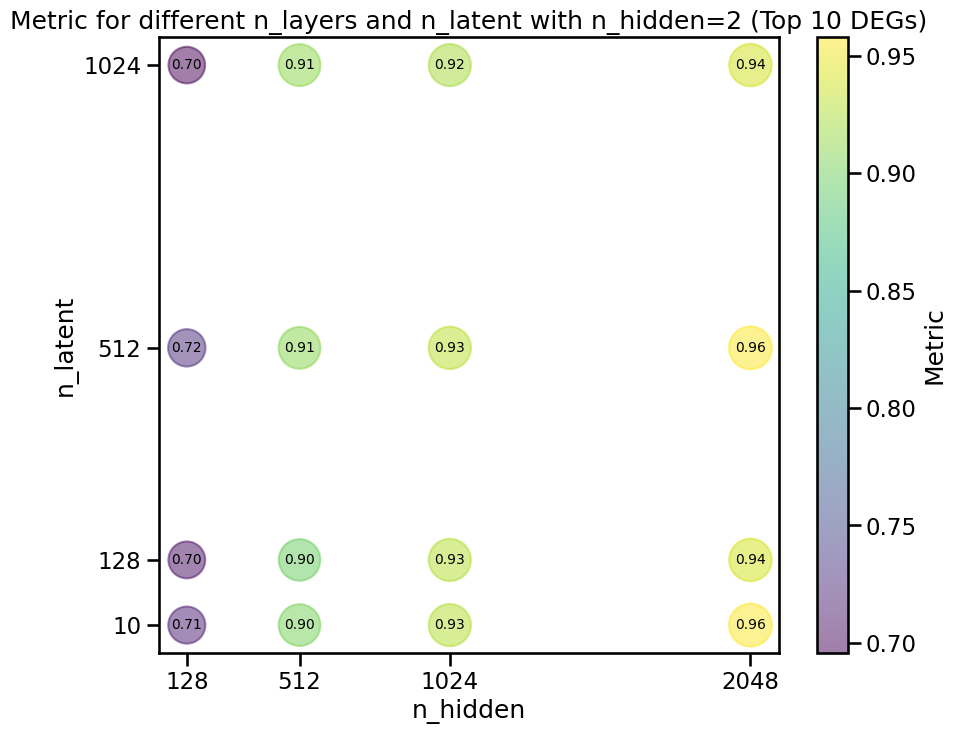

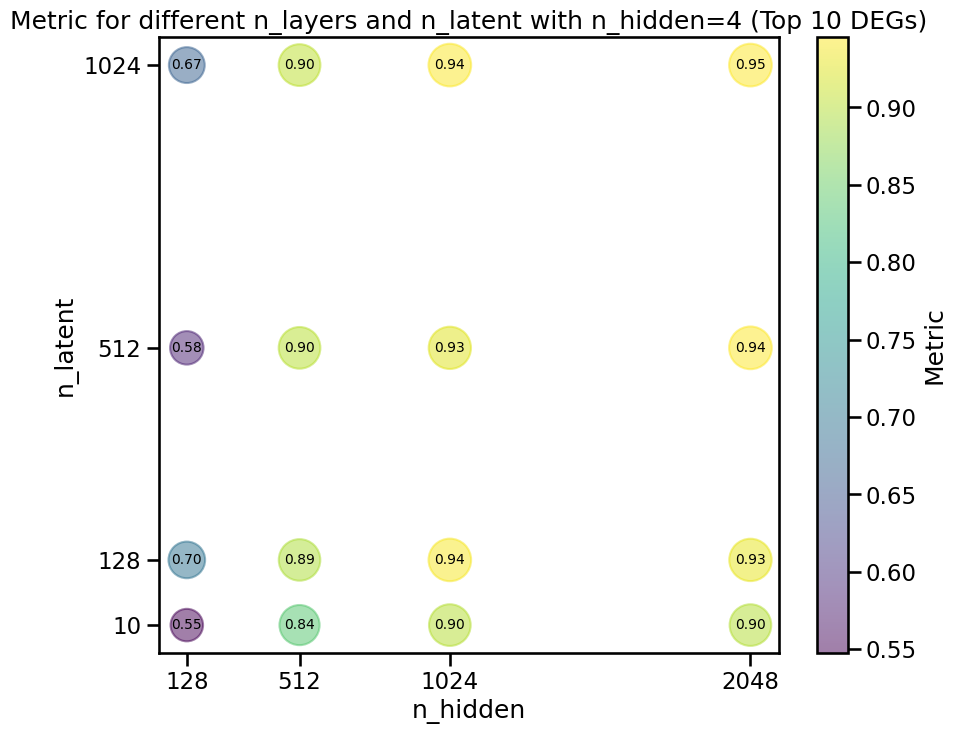

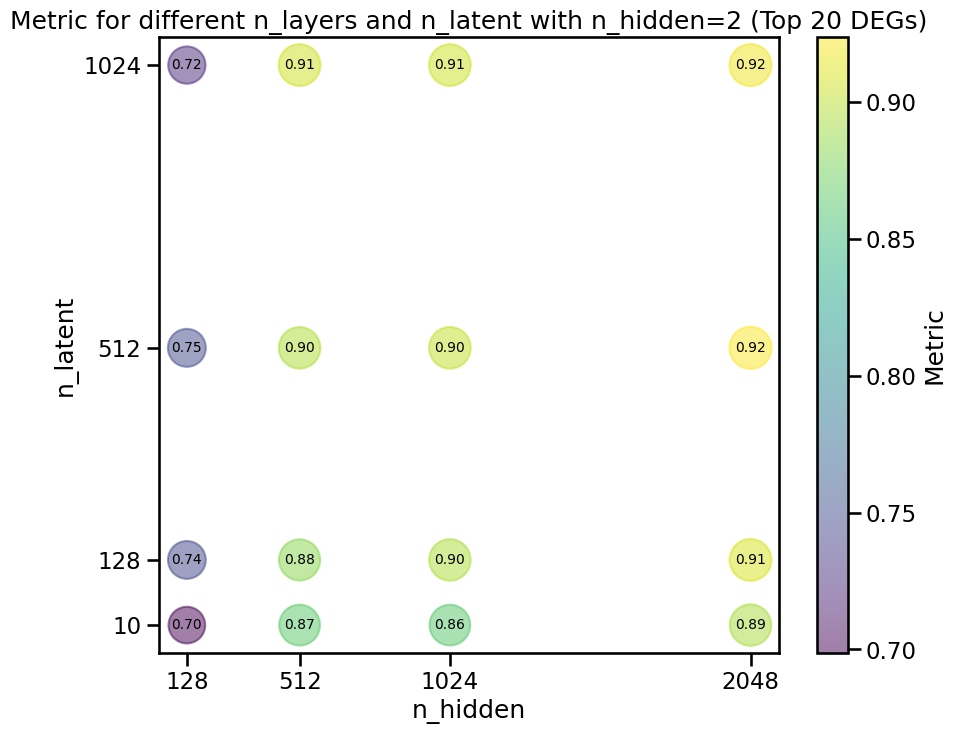

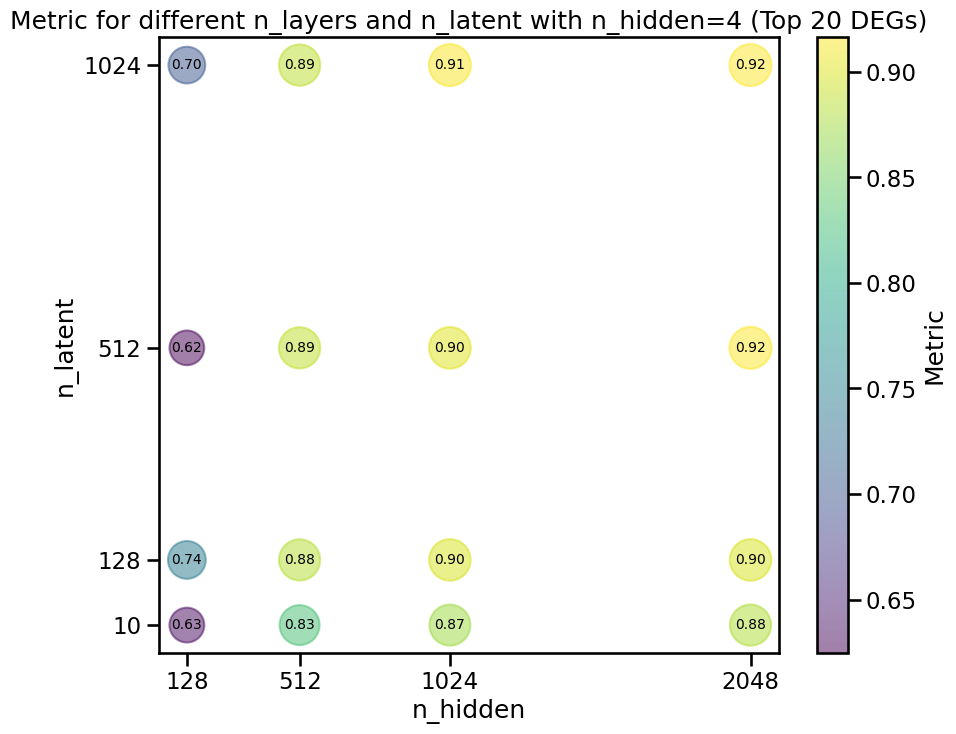

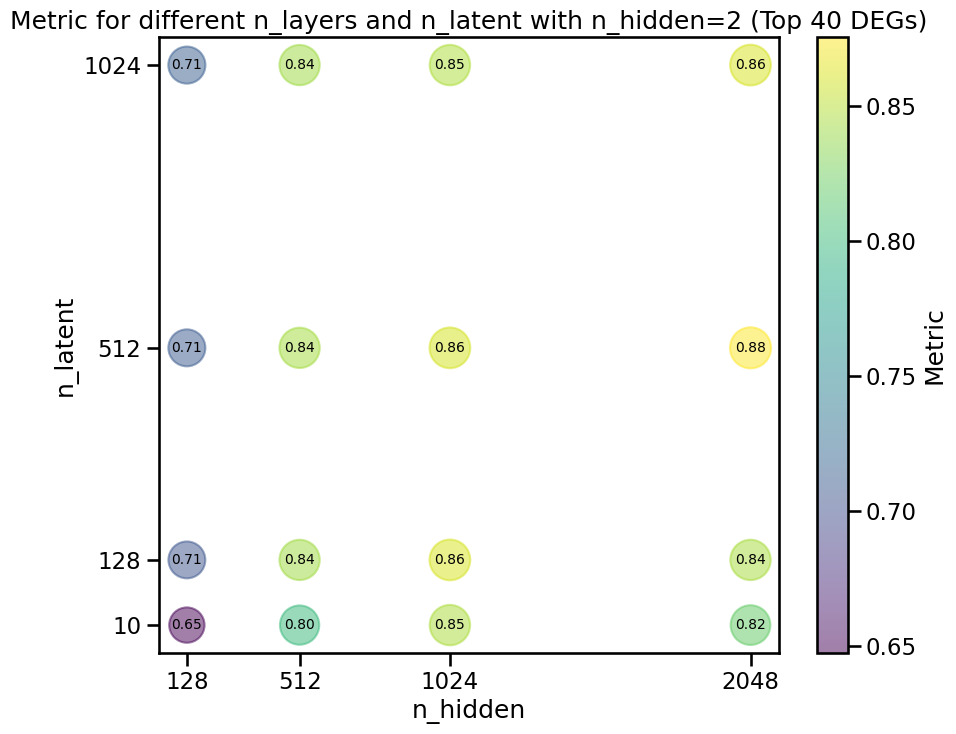

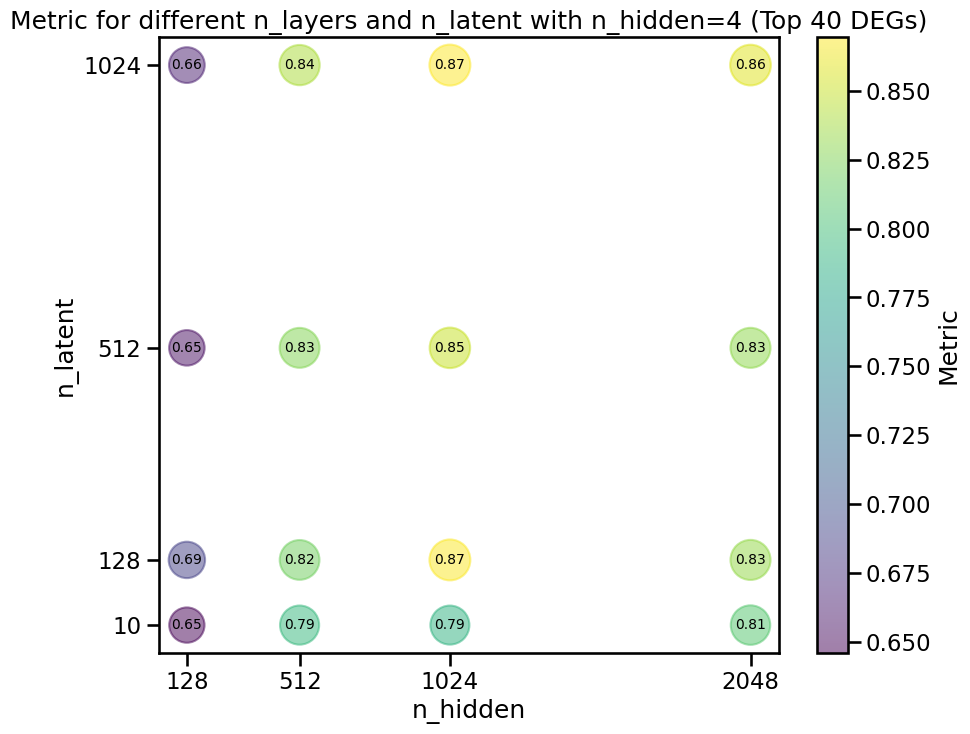

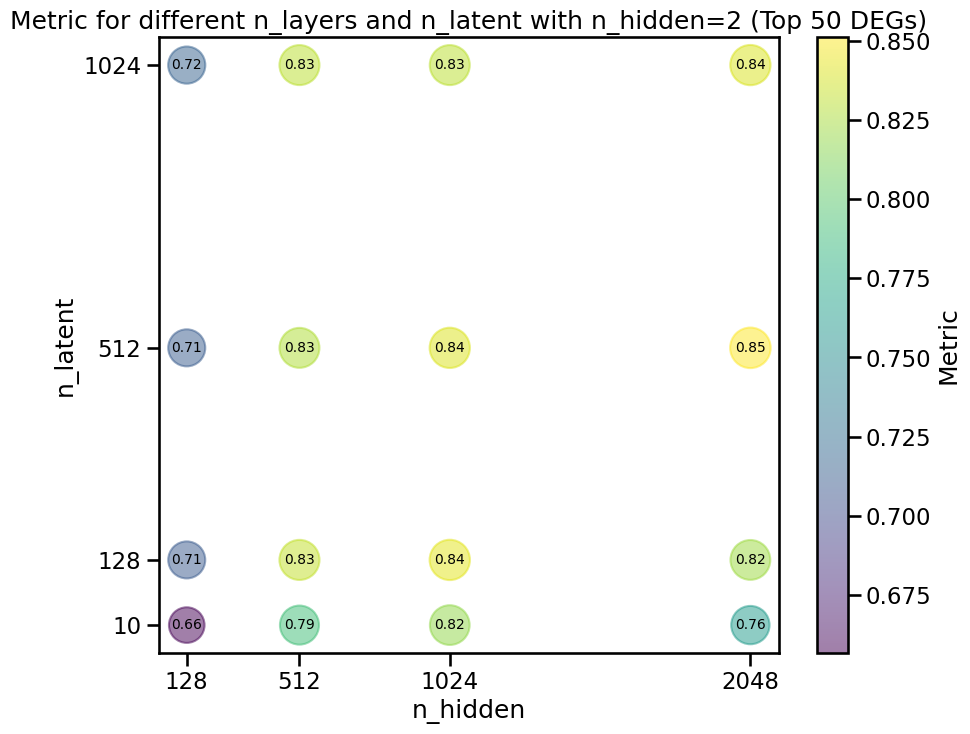

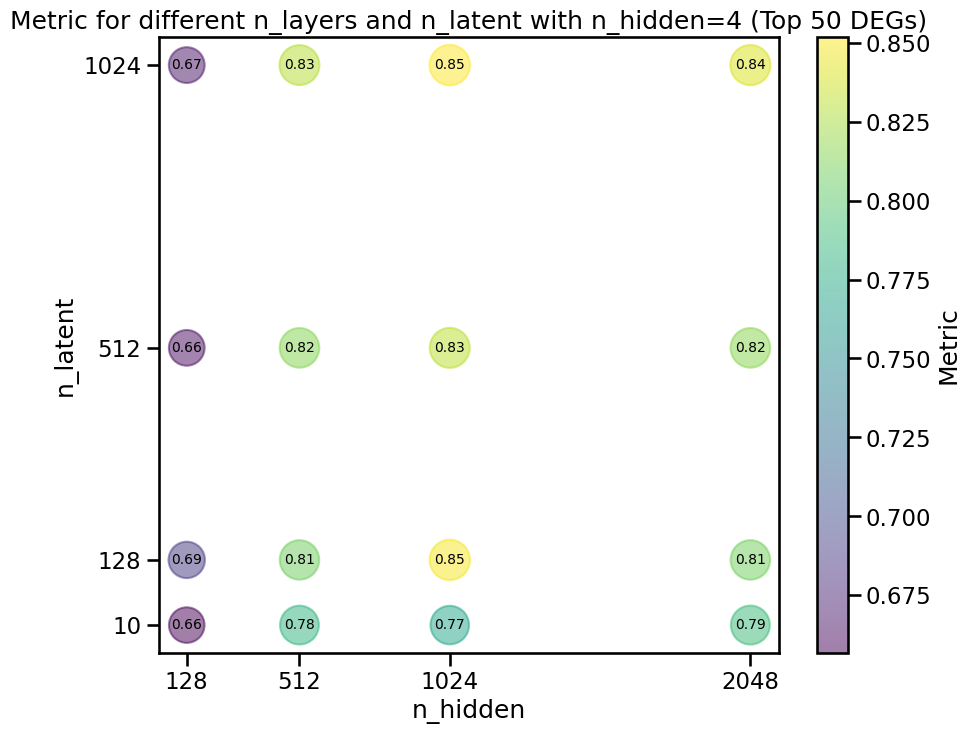

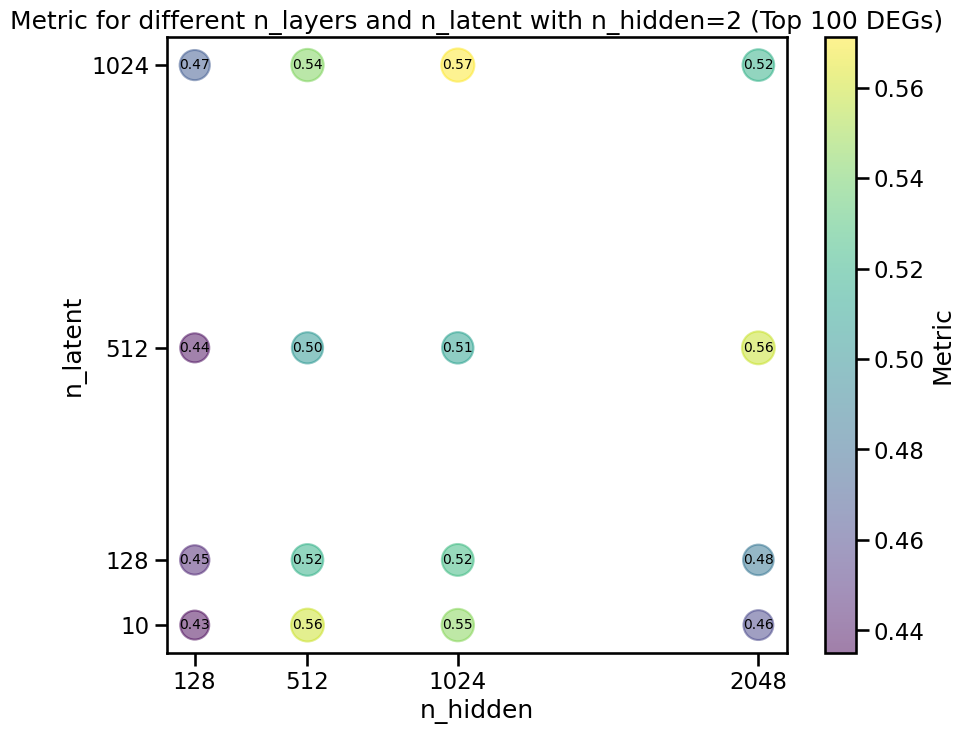

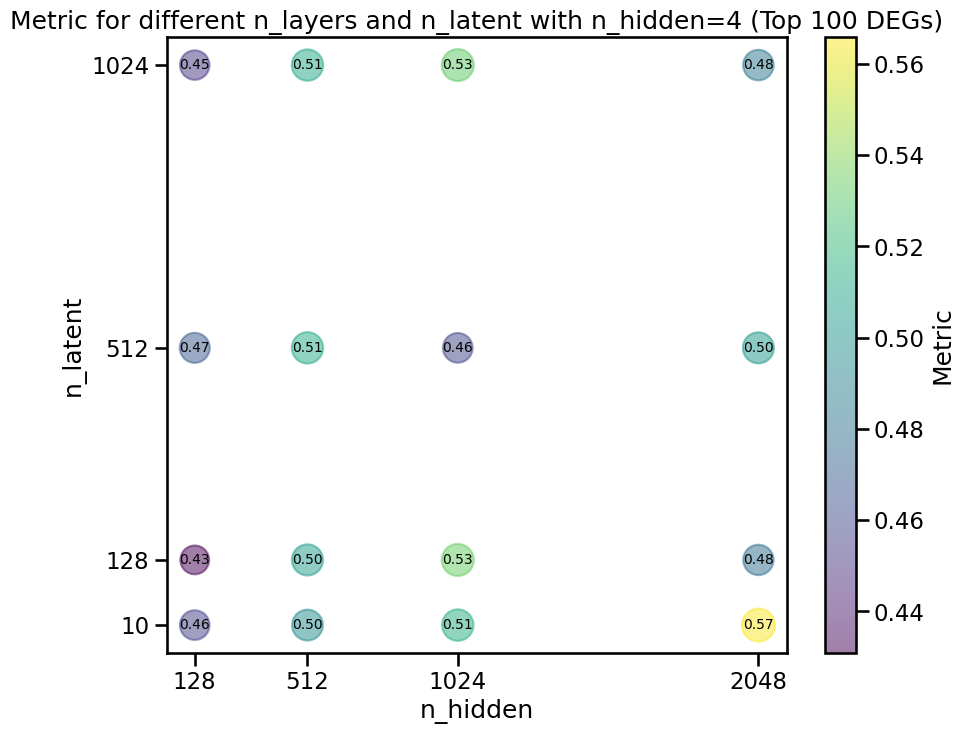

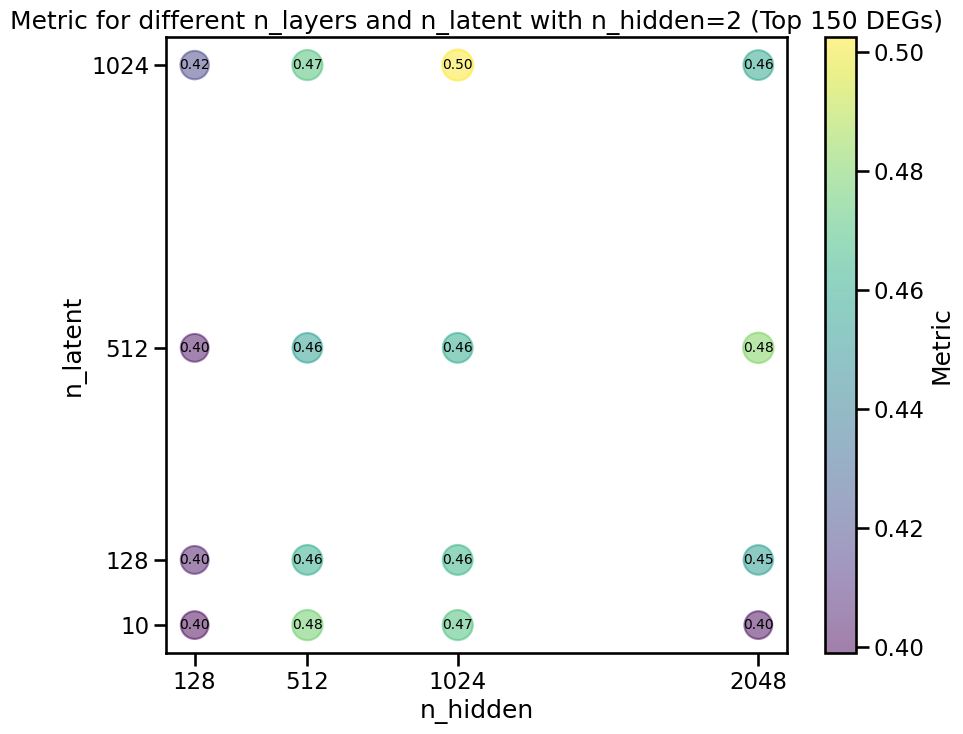

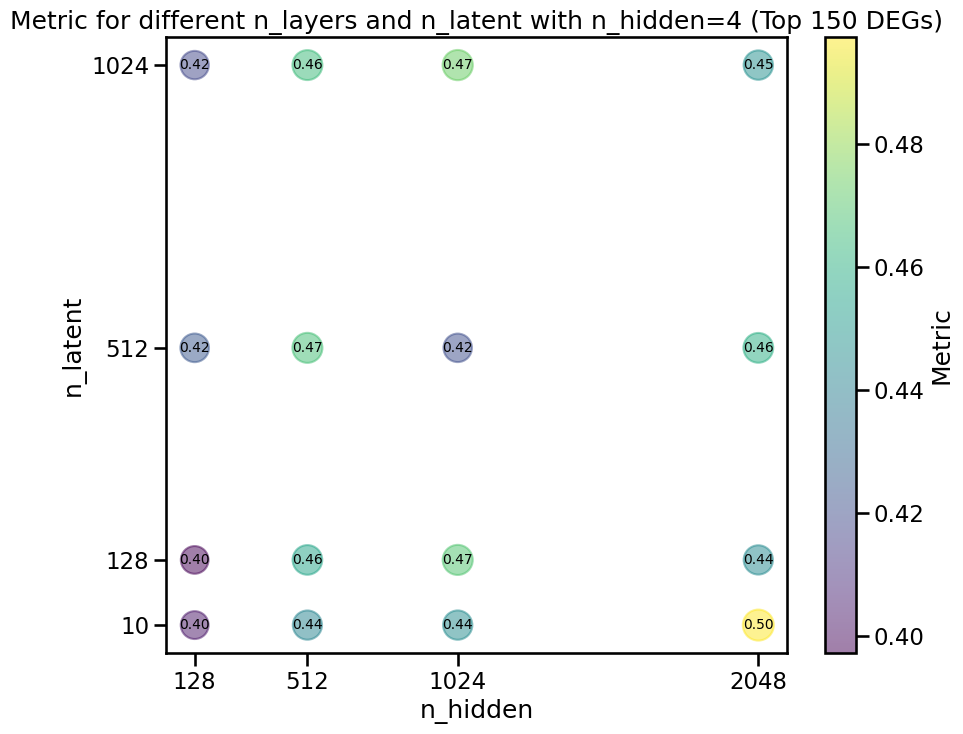

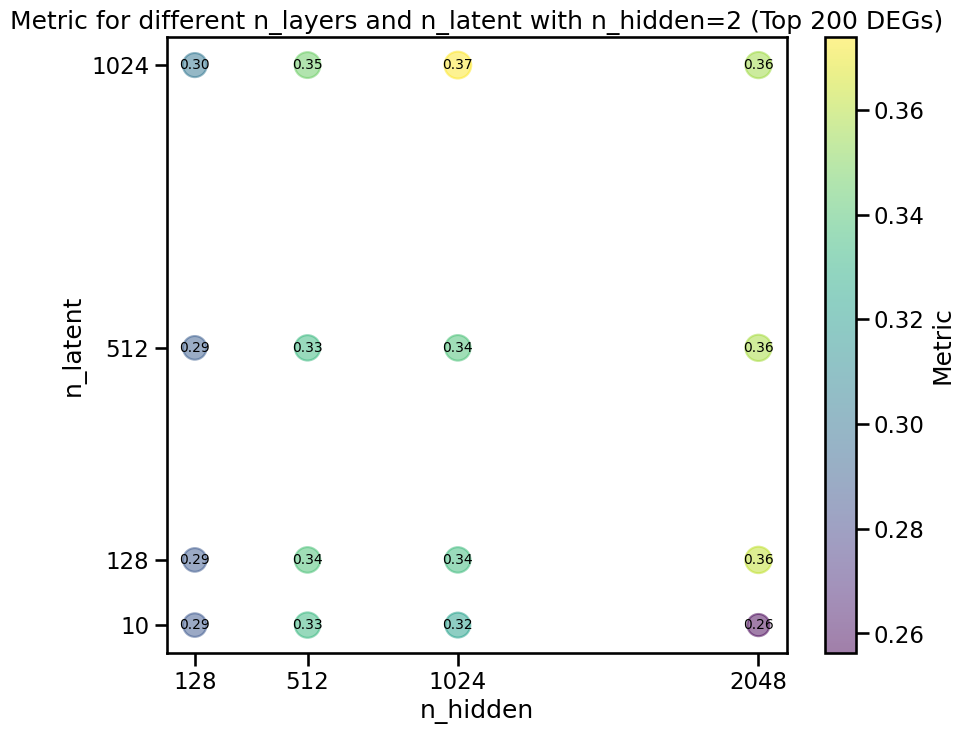

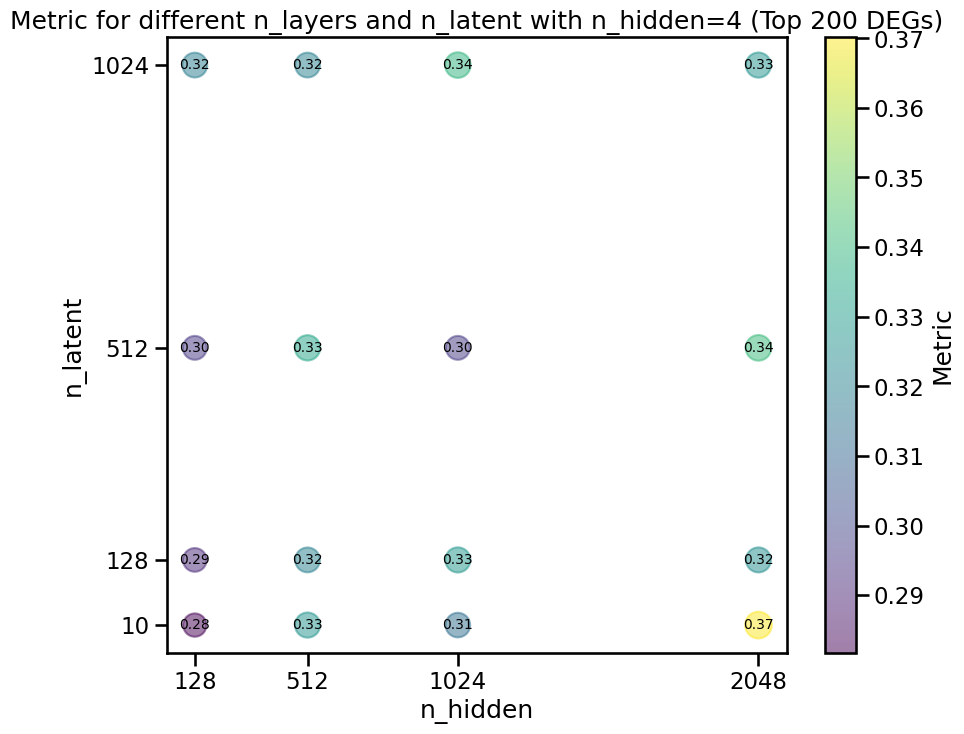

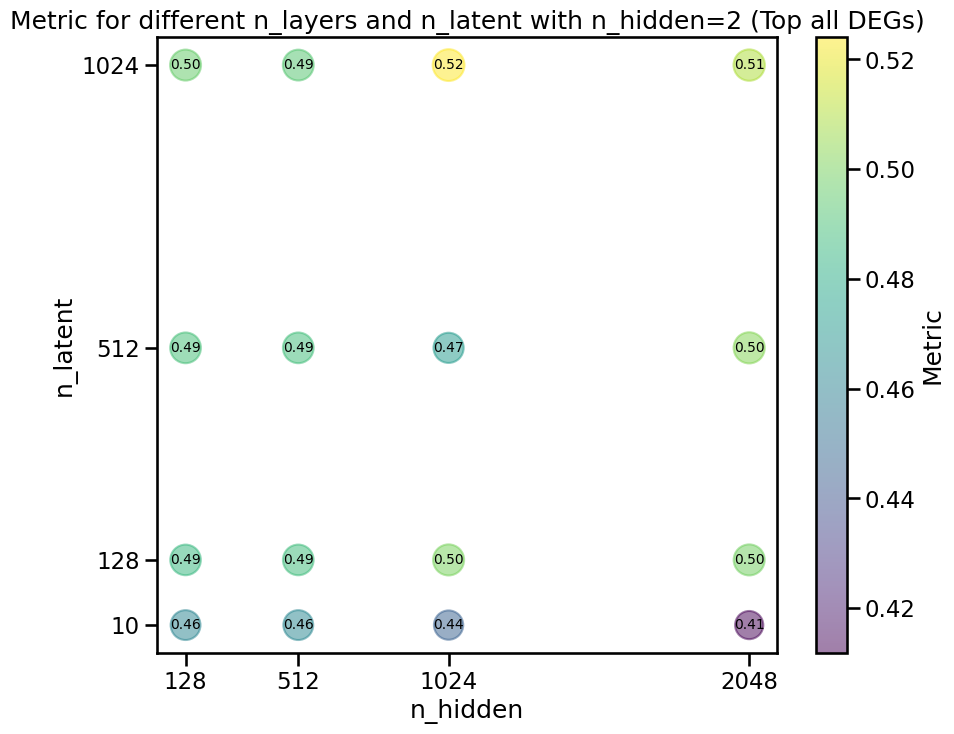

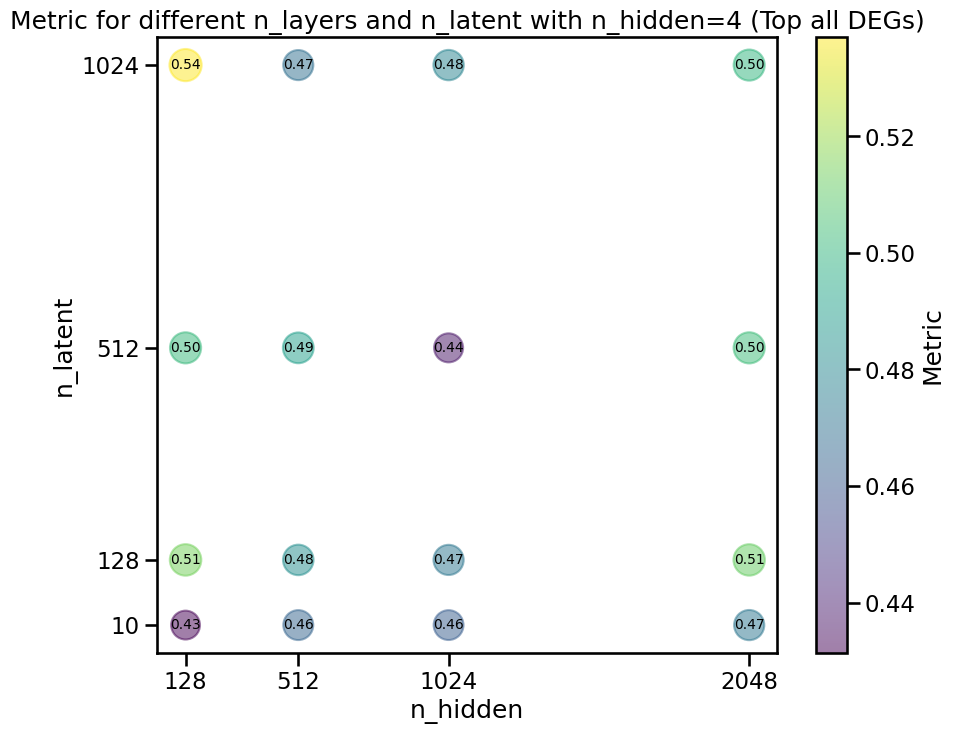

In [78]:
for row_name in r2_results.index:
    score_name = f"pearson_{row_name}"
    fixed_values = sorted(df['n_layers'].unique())

    for fixed_value in fixed_values:
        subset = df[df['n_layers'] == fixed_value].sort_values(by=['n_hidden', 'n_latent'])
        plt.figure(figsize=(10, 8))
        plt.scatter(subset['n_hidden'], subset['n_latent'], s=subset[score_name]*1000, alpha=0.5, c=subset[score_name], cmap='viridis')
        for i in range(subset.shape[0]):
            plt.text(subset['n_hidden'].iloc[i], subset['n_latent'].iloc[i], 
                     f'{subset[score_name].iloc[i]:.2f}', ha='center', va='center', fontsize=10)

        plt.colorbar(label='Metric')
        plt.xlabel('n_hidden')
        plt.ylabel('n_latent')
        plt.title(f'Metric for different n_layers and n_latent with n_hidden={fixed_value} (Top {row_name} DEGs)')
        plt.xticks(sorted(df['n_hidden'].unique()))  # Ensuring x-axis is sorted
        plt.yticks(sorted(df['n_latent'].unique()))  # Ensuring y-axis is sorted
        plt.show()

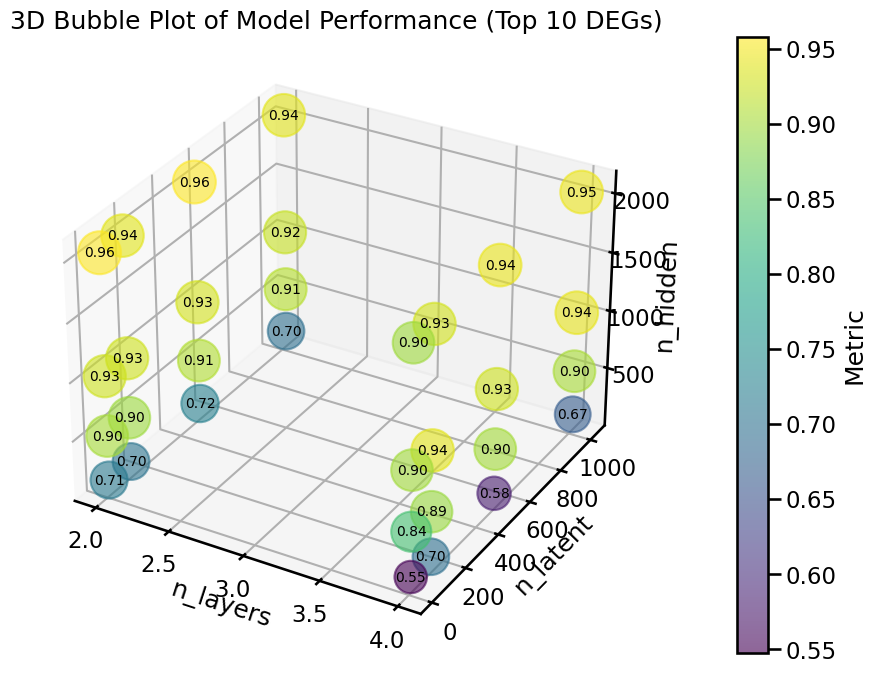

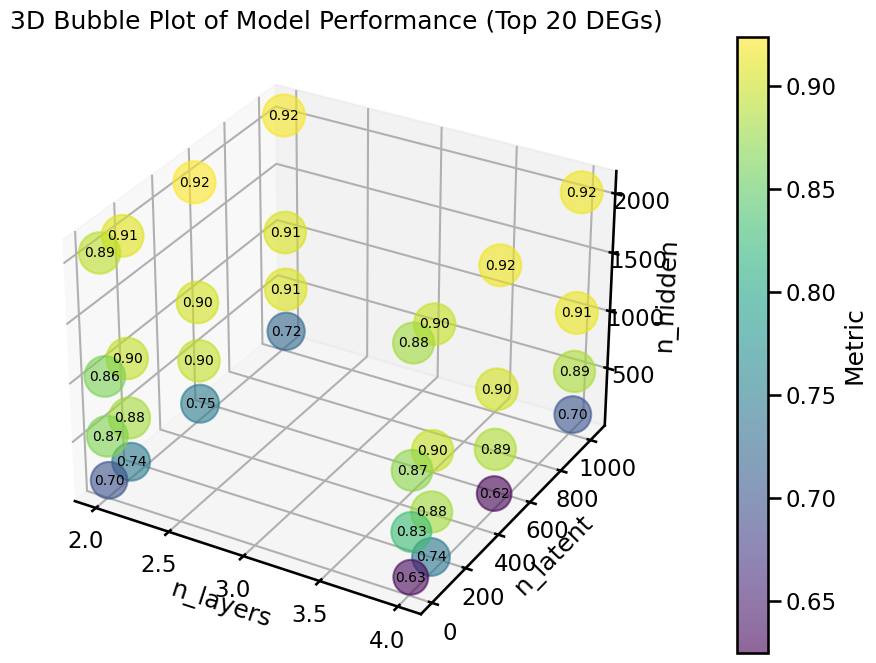

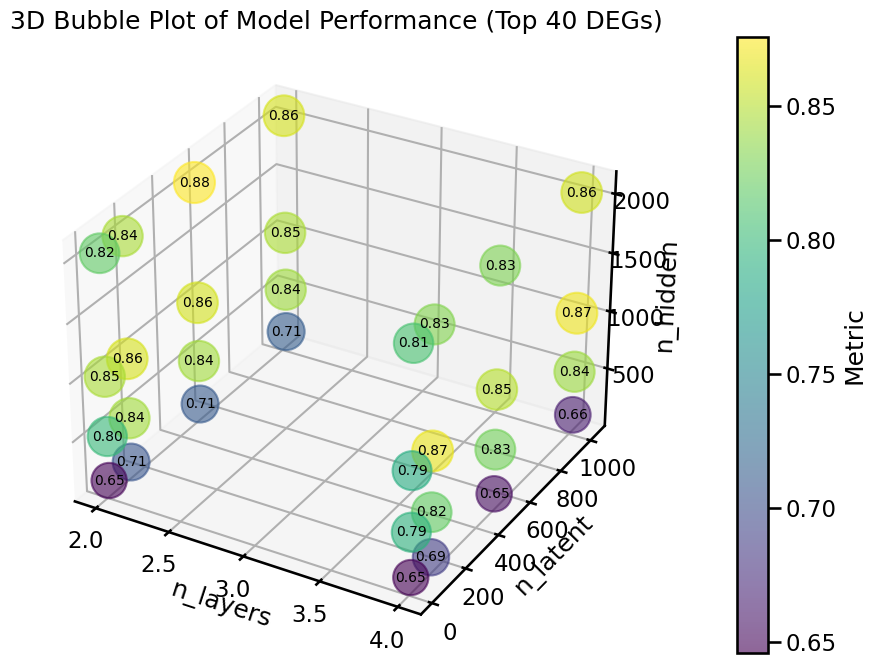

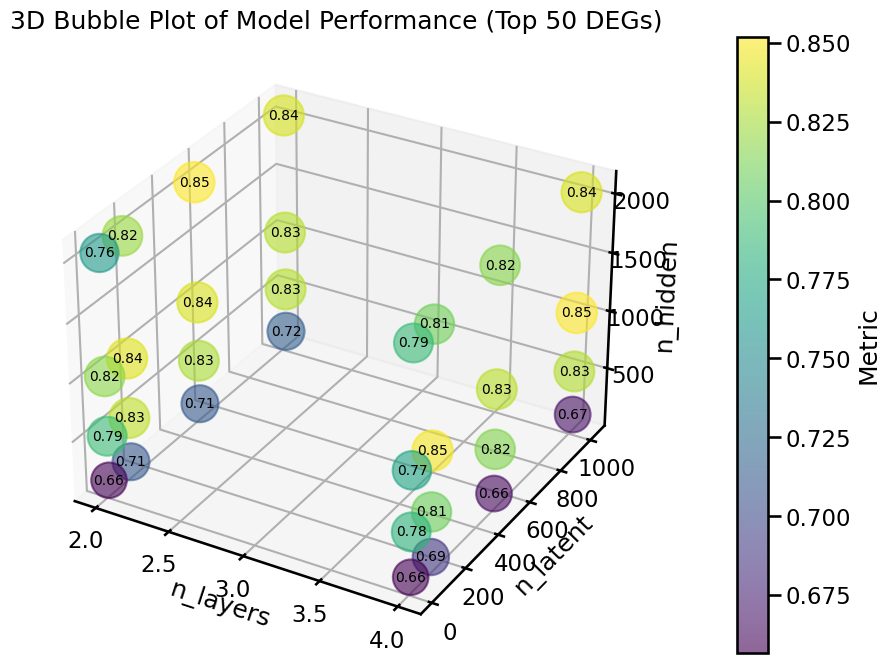

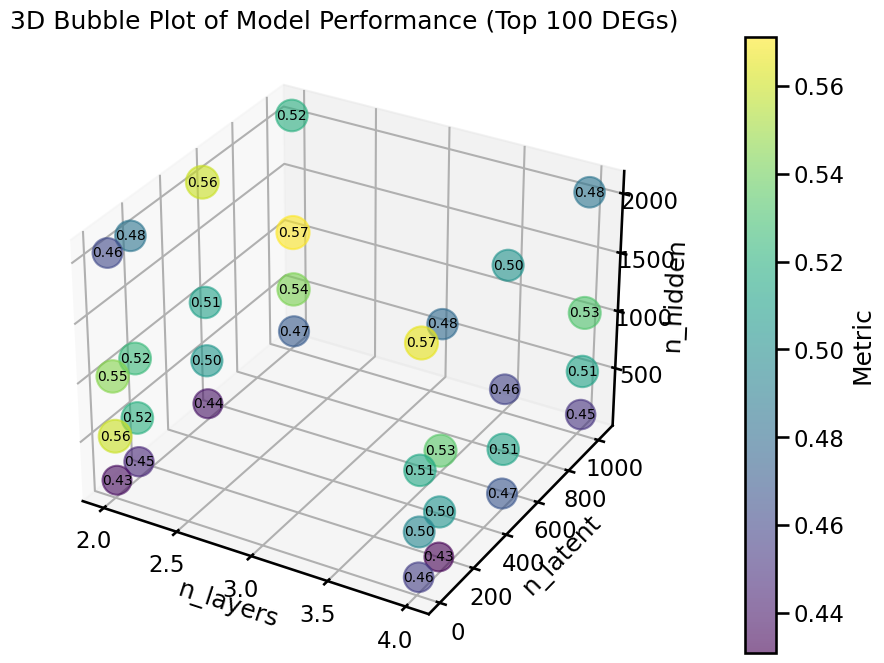

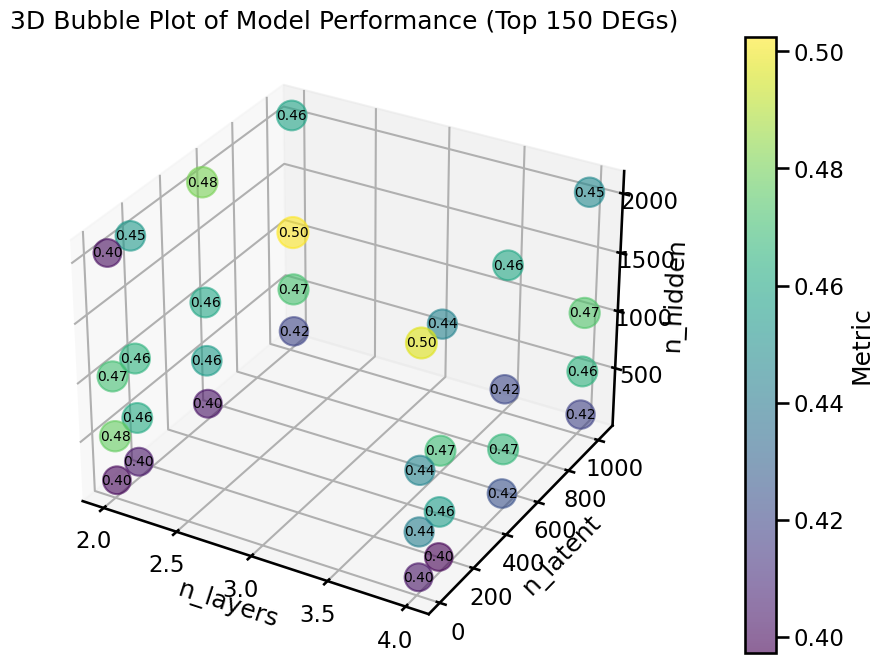

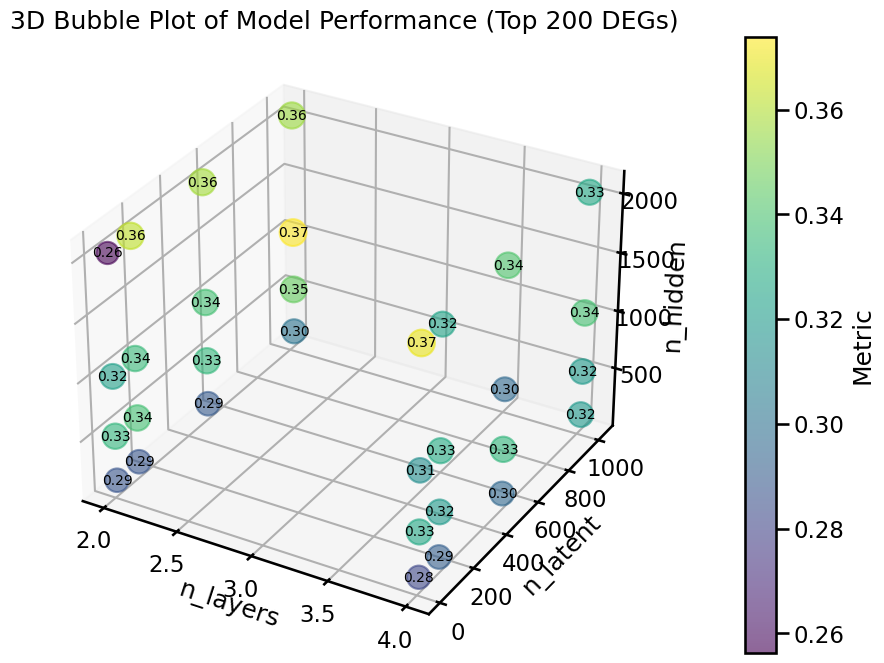

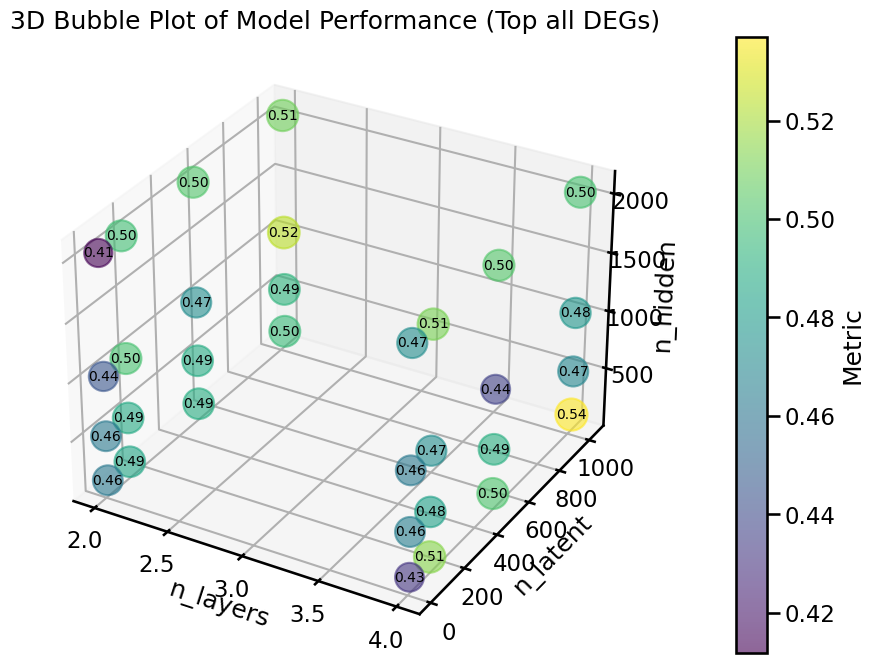

In [79]:
from mpl_toolkits.mplot3d import Axes3D
for row_name in r2_results.index:
    score_name = f"pearson_{row_name}"
    # Sorting the DataFrame to ensure the plot is orderly
    df = df.sort_values(by=['n_layers', 'n_latent', 'n_hidden'])

    # Create 3D bubble plot
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Scatter plot
    scatter = ax.scatter(df['n_layers'], df['n_latent'], df['n_hidden'], 
                         s=df[score_name]*1000, c=df[score_name], cmap='viridis', alpha=0.6)
    for i in range(df.shape[0]):
        ax.text(df['n_layers'].iloc[i], df['n_latent'].iloc[i], df['n_hidden'].iloc[i], 
                f'{df[score_name].iloc[i]:.2f}', color='black', ha='center', va='center', fontsize=10)

    # Labels
    ax.set_xlabel('n_layers')
    ax.set_ylabel('n_latent')
    ax.set_zlabel('n_hidden')
    ax.set_title(f'3D Bubble Plot of Model Performance (Top {row_name} DEGs)')

    # Color bar
    cbar = plt.colorbar(scatter, ax=ax, pad=0.1)
    cbar.set_label('Metric')

    # Show plot
    plt.show()